In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitudes combinations.
lats = np.random.uniform(low= -90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use print() function to apply the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

82.47117269055724 -120.49062872347943
63.40191872171792 -169.50961352491353
67.12630860597204 89.29248640091623
6.436148029769299 -49.519408954255084
48.95505813344221 -45.91299725411139
-7.2299275787154755 -6.502606404939627
73.8193494103688 128.98272164067464
69.01558216210651 106.98109854570043
26.38253971952453 -54.65339813059981
-44.99412829404709 -94.13284696589115
-83.33202741218405 35.09547633245501
-84.51999115313417 -98.38082431180356
-72.20430980824733 89.0391301459619
53.53986091240074 -36.04661247093307
35.38701068375016 78.289745802612
-36.016430276618735 -77.43605092279341
62.2375219434625 -102.1844970636978
-55.94439879992354 47.7980421959233
-18.905397140514026 84.4086571174766
66.54903450417382 -1.5341350609250526
67.1011589376188 1.2780606080257257
-73.42817695893152 -16.18719977265522
-63.15227449280402 -173.90559097490842
34.061972468681816 -41.932945811636245
-24.81689038340471 115.55728112506182
-75.78562744159099 -110.88760256005624
42.776255887084574 -17.385735

69.05106426221076 -108.81225177374986
-85.35501954322487 -141.20091183964848
59.7456361257162 -130.55813206153152
46.364352691271904 27.427485498121086
-47.78670887205644 157.97485334654033
-27.601380056409788 19.96044592748524
78.09223333912854 -128.88611847905665
-73.20301744828649 136.68534289170606
-71.33621176867115 34.62523594632481
0.005693724130509281 -74.62062915287372
-68.66224955431049 37.288732576245735
-74.99777064504568 -65.79458470671042
-42.562435196223056 -31.90020974874369
57.70448253233056 -68.56485001126678
-0.6197517808513311 -178.7620081674384
-59.19029219051562 38.54396508561939
-38.073991203419105 -0.4900881332189897
-32.76224751962082 20.073476937856384
53.98363809041979 91.94574464202503
11.453859793663838 65.22550575400635
16.11898648200784 -59.77071921416869
47.58109167527266 -23.5677455157317
-67.61263335285255 143.23502308461582
54.564957643011354 161.73162577200867
89.01812773168152 -69.63636341465818
85.29408567679704 -60.22499877297906
-43.5871000455562

58.39122971149621 -171.75485242552807
6.745353762351442 -100.42143836771122
62.57819691364281 71.69675164467372
-37.430419111050654 170.02184693389574
18.25528915554905 -162.84287982392667
51.6819354995593 102.74739132052349
-9.289497235610824 -61.04123987582442
47.249125882631176 84.50810045780395
22.34016817094053 27.993784620193225
4.933899232660153 -116.87785182820119
23.488627056825564 -172.9058918997361
-18.60337625507347 25.75704831700108
37.00211836634493 100.68441669988016
-61.0329566133372 -170.17131975188326
82.05508702857605 -137.82075338118116
75.71531300850677 -46.030724846788615
-17.645808168836368 -151.46381228726494
-12.403941714862611 42.34512990058644
-26.162959265493768 18.997331692691233
35.534875660545026 -14.386137972664415
-67.21557593054361 -123.89589319616522
53.05616932810307 -4.771243717485078
75.24498588335746 112.59792375562216
61.61335070206741 12.960269718155388
28.761576088316303 -10.412517184930039
6.396183759120191 82.49504027899911
-17.67929322398735

In [5]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [6]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combinations.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

In [7]:
# import the requests library
import requests

# import the API key
from config import weather_api_key


In [8]:
# Starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | lavrentiya
Processing Record 3 of Set 1 | svetlogorsk
Processing Record 4 of Set 1 | cayenne
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | nanortalik
Processing Record 15 of Set 1 | leh
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | flin flon
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | brae
Processing Record 21 of Set 1 | raudeberg
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | vain

Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | miri
Processing Record 44 of Set 4 | arlit
Processing Record 45 of Set 4 | cabo san lucas
Processing Record 46 of Set 4 | bansko
Processing Record 47 of Set 4 | half moon bay
Processing Record 48 of Set 4 | hervey bay
Processing Record 49 of Set 4 | talnakh
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | alice
Processing Record 2 of Set 5 | zemio
Processing Record 3 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 4 of Set 5 | kalbay
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | linguere
Processing Record 7 of Set 5 | miranda
Processing Record 8 of Set 5 | seoul
Processing Record 9 of Set 5 | sungaipenuh
Processing Record 10 of Set 5 | kununurra
Processing Record 11 of Set 5 | preobrazheniye
Processing Record 12 of Set 5 | gboko
Processing Record 13 of Set 5 | jasper
Processing Record 14 of Set 5 | pampa
Processing Record 15 of Set 5 | maniitsoq
Proce

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,51.39,43,100,5.99,US,2022-05-07 04:10:49
1,Busselton,-33.6500,115.3333,66.67,50,1,9.15,AU,2022-05-07 04:14:52
2,Ilulissat,69.2167,-51.1000,3.99,83,11,7.05,GL,2022-05-07 04:12:44
3,Punta Arenas,-53.1500,-70.9167,46.51,81,100,5.75,CL,2022-05-07 04:14:53
4,Hilo,19.7297,-155.0900,82.27,85,100,4.61,US,2022-05-07 04:14:53
5,Sitka,57.0531,-135.3300,46.29,66,40,5.75,US,2022-05-07 04:13:08
6,Vaini,-21.2000,-175.2000,75.36,88,75,9.22,TO,2022-05-07 04:10:28
7,Saint-Georges,12.0564,-61.7485,78.73,78,100,12.26,GD,2022-05-07 04:11:37
8,Oranjestad,12.5240,-70.0270,79.66,87,100,19.73,AW,2022-05-07 04:10:00
9,Nanortalik,60.1432,-45.2371,34.59,98,100,3.40,GL,2022-05-07 04:14:53


In [22]:
new_city_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_city_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-05-07 04:10:49,42.6001,-73.9662,51.39,43,100,5.99
1,Busselton,AU,2022-05-07 04:14:52,-33.6500,115.3333,66.67,50,1,9.15
2,Ilulissat,GL,2022-05-07 04:12:44,69.2167,-51.1000,3.99,83,11,7.05
3,Punta Arenas,CL,2022-05-07 04:14:53,-53.1500,-70.9167,46.51,81,100,5.75
4,Hilo,US,2022-05-07 04:14:53,19.7297,-155.0900,82.27,85,100,4.61
5,Sitka,US,2022-05-07 04:13:08,57.0531,-135.3300,46.29,66,40,5.75
6,Vaini,TO,2022-05-07 04:10:28,-21.2000,-175.2000,75.36,88,75,9.22
7,Saint-Georges,GD,2022-05-07 04:11:37,12.0564,-61.7485,78.73,78,100,12.26
8,Oranjestad,AW,2022-05-07 04:10:00,12.5240,-70.0270,79.66,87,100,19.73
9,Nanortalik,GL,2022-05-07 04:14:53,60.1432,-45.2371,34.59,98,100,3.40


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

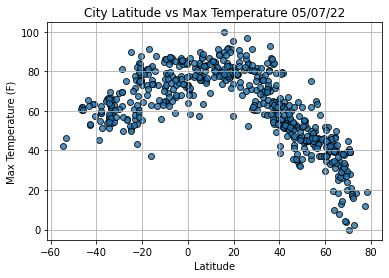

In [29]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha = 0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# SHow plot
plt.show()

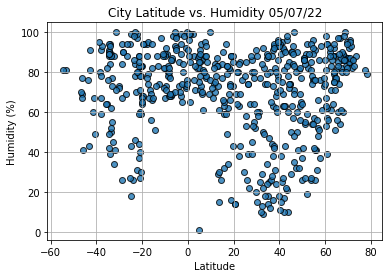

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

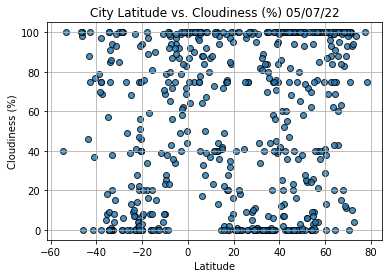

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

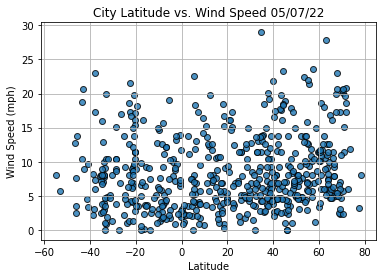

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

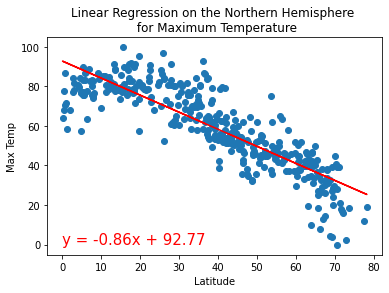

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,0))

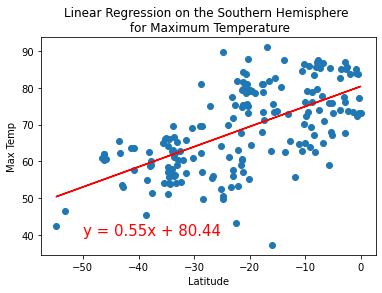

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,40))

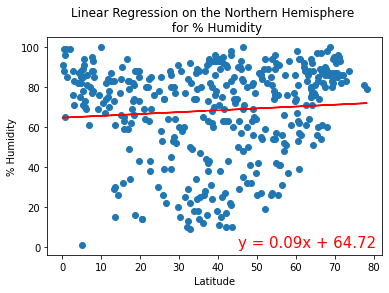

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,0))

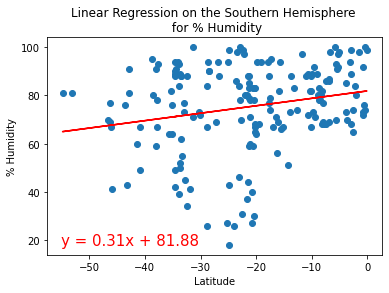

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,18))

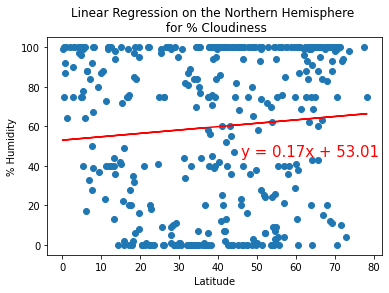

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Humidity',(46,45))

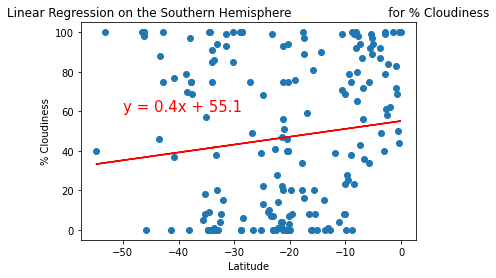

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

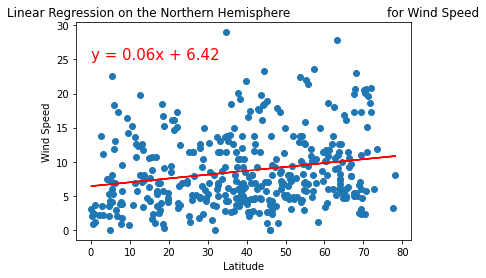

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,25))

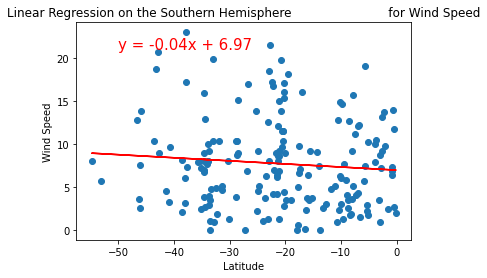

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,21))